In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fit_func(vs):
    # paraboloid with minimum of 0 at (c, d) 
    #c, d = -2, 9
    #z = (vs[0] - c)**2 + (vs[1] - d)**2 
    
    # unmodal function with minimum of -1 at (pi,pi)
    #z = -np.cos(vs[0]) * np.cos(vs[1]) * np.exp(-((vs[0] - np.pi)**2 + (vs[1] - np.pi)**2))
    
    # ackley function with mininimum of 0 at (0, 0)
    z = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (vs[0]**2 + vs[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * vs[0]) + np.cos(2 * np.pi * vs[1]))) + np.e + 20
    return z

In [11]:
# implemented from pseudocode in "Search and Optimization by Metaheuristics"

# fitness function parameters 
dims = 2
lims = [(-5, 5, dim) for dim in range(dims)]

# algorithm parameters
T = 100 # initial temperature of system
T_freeze = 0.01 # Temperature at which annealing is stopped
L = 10 # Length of Markov chain - inner loop iterations 
a = 0.95 # temperature degradation rate

# saving the best points for visualization 
all_points = []
best_points = []

# Initializing point
x = np.zeros(dims)
for lim_low, lim_up, dim in lims:
    x[dim] = np.random.uniform(lim_low, lim_up) 
    
# While temperature not at freezing temperature 
while T > T_freeze:
    
    # iterate for a given temperature 
    for i in range(L): 
        # Applying random permutation within the search space
        y = np.copy(x)
        for lim_low, lim_up, dim in lims:
            scale = (lim_up - lim_low) / 2 # use np.exp(10/T) maybe? 
            # Add a normal distributed value within the bounds 
            y[dim] += np.random.normal(loc = 0, scale = scale) 
            
        # Correct the values to keep them within bounds
        y[y > lim_up] = lim_up
        y[y < lim_low] = lim_low
        
        # Evaluate change in energy 
        delta = fit_func(y) - fit_func(x)
        
        #if energy lower accept new state
        if delta < 0:  
            x = y
            best_points.append(y) # data for plotting
        # else accept with given probality
        elif np.random.rand() < np.exp((- delta) / T):
            x = y 
            best_points.append(y) # data for plotting
        all_points.append(y) # data for plotting
        
    # Temperature scheduling
    T = T * a
    
print("The best position: ", x)
print("Value at best position: ", fit_func(x))

The best position:  [ 0.2632498 -0.199775 ]
Value at best position:  2.5111792542179963


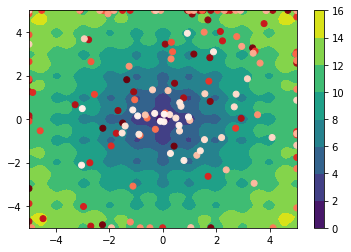

In [8]:
back_x = np.linspace(-5, 5, 100)
back_y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(back_x, back_y)
Z = fit_func([X, Y])

plt.contourf(X, Y, Z, cmap='viridis');
plt.colorbar();

duration = 170
x = [point[0] for point in best_points[-duration:]]
y = [point[1] for point in best_points[-duration:]]
plt.scatter(x, y, c = range(duration), cmap = "Reds_r")
plt.show()

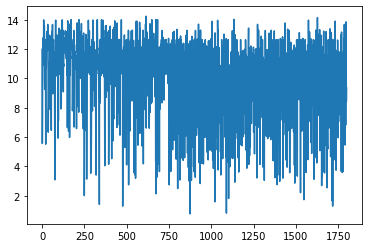

In [9]:
# fitness evaluated for every calculated point
fitness_vals = [fit_func(x) for x in all_points]
plt.plot(fitness_vals)
plt.show()

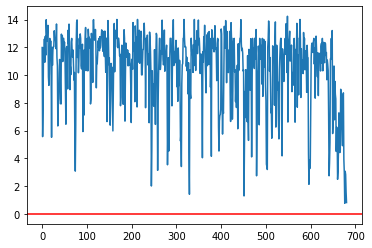

In [10]:
# fitness for points that improve fitness or pass acceptance criteria
fitness_vals = [fit_func(x) for x in best_points]
plt.plot(fitness_vals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()